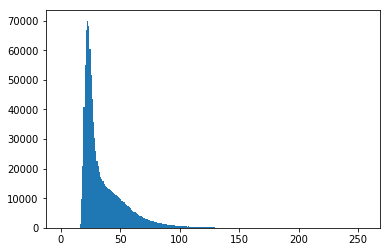

In [4]:
'''
 * Python program to use contours to count the objects in an image.
 *
 * usage: python Contours.py <filename> <threshold>
'''
import cv2, sys
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

img = cv2.imread('/home/garner1/Work/dataset/cellImages/image52/iMS266_20190426_001.sub52.jpg',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [226]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def find_markers(img,iterations):
    # filename = '/home/garner1/Work/dataset/cellImages/image52/equalised_iMS266_20190426_001.sub52.tif'
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    # thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,9, 0) 
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = iterations) # normally 2

    # sure background area
    sure_bg = cv.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
    ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv.connectedComponents(sure_fg)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    return markers, img

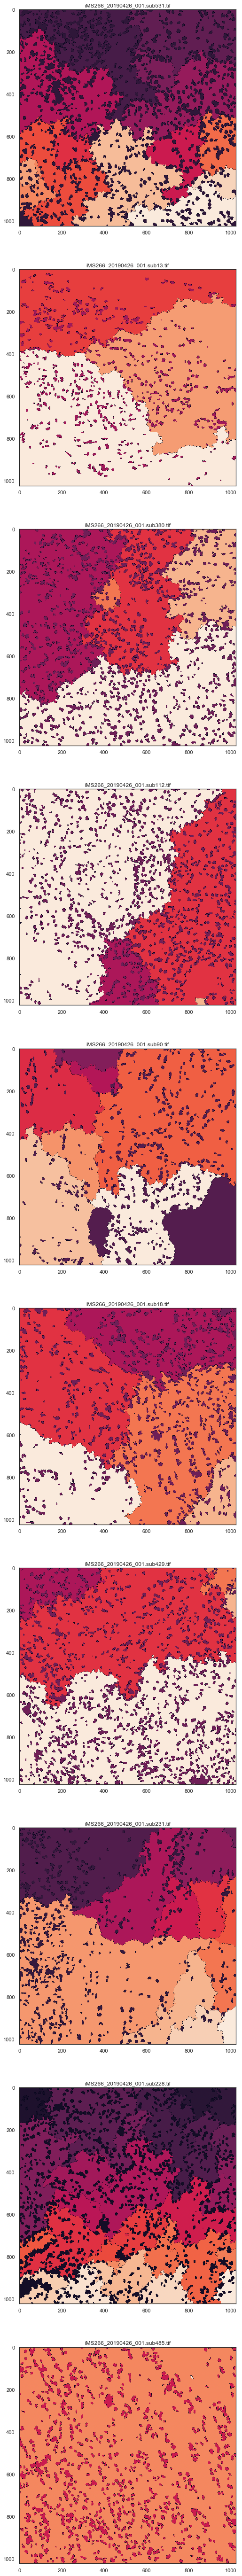

In [233]:
import os
sns.set(style='white', context='notebook', rc={'figure.figsize':(100,100)})
    
# directory = '/home/garner1/Work/dataset/cellImages/image52/Images_Patient_52/equalised'
directory = '/home/garner1/Work/dataset/cellImages/image52/Images_Patient_52/original'
count = 1
for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        img = cv.imread(path)
        markers, img = find_markers(img,1)
        
        plt.subplot(len(os.listdir(directory)), 1, count)
        plt.title(filename)
        plt.imshow(markers)
        count += 1


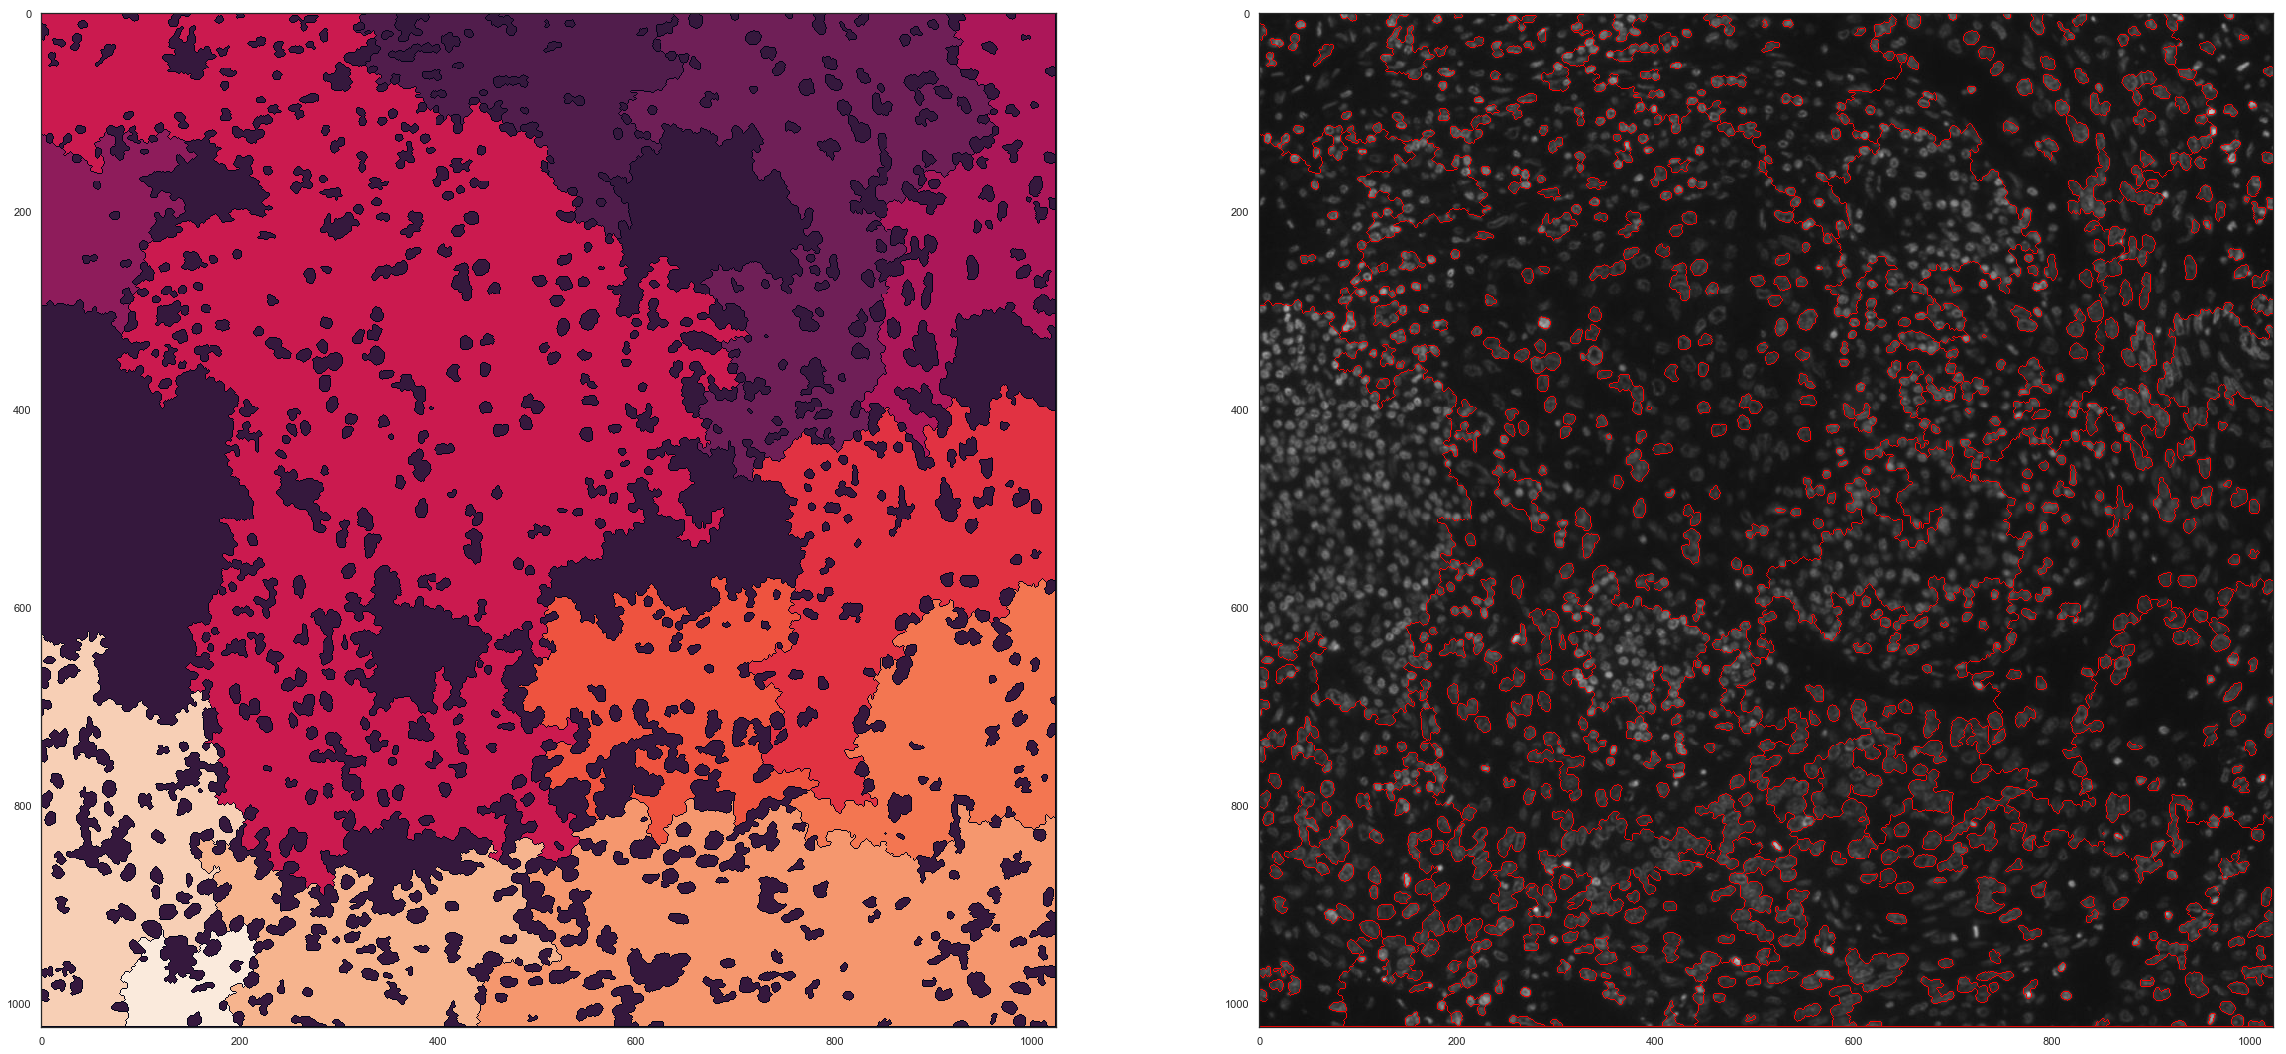

In [234]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(40,40)})

filename = '/home/garner1/Work/dataset/cellImages/image52/iMS266_20190426_001.sub52.jpg'
image0 = cv.imread(filename)

markers, img = find_markers(image0,2)
plt.subplot(1, 2, 1)
plt.imshow(markers)
plt.subplot(1, 2, 2)
plt.imshow(img)


In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(200,200)})
marks = np.unique(markers)
for ind in range(len(marks)):
    img2 = np.copy(img)
    plt.subplot(len(marks), 1, ind+1)
    img2[markers != marks[ind]] = [0,0,0]
    plt.title('Pseudo-cell '+str(marks[ind]))
    plt.imshow(img2)  #show only marks[ind] in image
    